In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)
from IPython.display import Image


In [3]:
Tref=773
lx=340
ly=150
endTime=0.1
timeStep=0.01
MCoke=12
MO2=32
pixelResolution=1e-6
YO2=0.22

- tiny 2: base
- tiny 2_1: the specific capacities of all the species are the same
- tiny 2_2: based on 2_1top and bottom B.C. are periodic 
- tiny 2_3: based on tiny2_2, automatic control time step based on the chemical time step
- tiny 2_4: based on tiny2_3, use the PCGStab solver
- tiny 2_6: based on tiny2_4, use the structured decomposition rule
- tiny 2_7: based on tiny2_1, use automatic control time step and the structured decomposition rule

structured decomposition rule


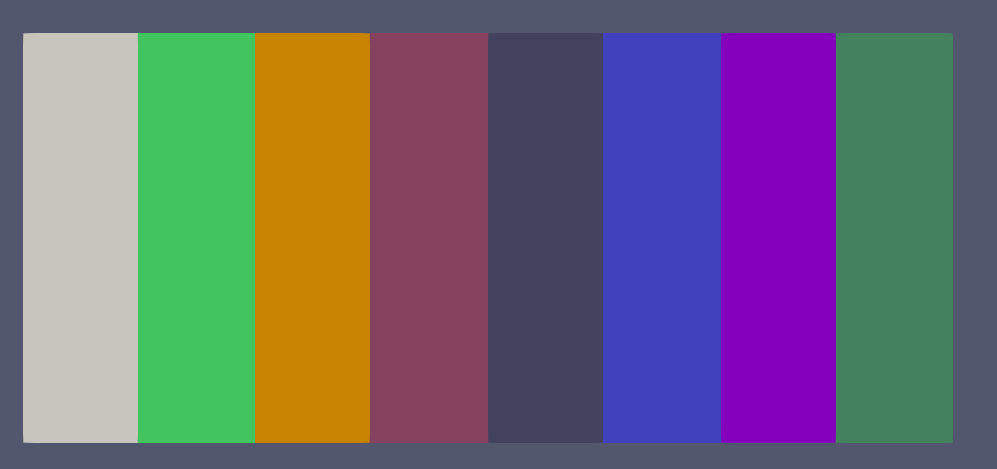

In [28]:
print("structured decomposition")
Image("./structured decomposition.png")

## Compare the combustion temperature

In [4]:
def reaMinMaxFile(fieldminMaxFile):
    with open(fieldminMaxFile,"r") as fp:
        comment=fp.readline()
        header=fp.readline()
    header=header[1:-1].split()
    indexs_processor=[]
    for i,name in enumerate(header):
        if header[i]=="processor":
            indexs_processor.append(i)
    indexs_processor.reverse()  

    data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
    data=data.drop(indexs_processor,axis=1)
    data.rename(columns=lambda x:header[x],inplace=True)
    return data

In [5]:
df_tiny2=reaMinMaxFile(r"./tiny2/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,772.9158,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(1.855000e-04 6.950000e-05 5.000000e-07)
1,2.640000e-09,T,772.8225,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(4.750000e-05 1.350000e-05 5.000000e-07)
2,4.367999e-09,T,772.7211,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(4.750000e-05 1.350000e-05 5.000000e-07)
3,6.441599e-09,T,772.6131,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(4.750000e-05 1.350000e-05 5.000000e-07)
4,8.929917e-09,T,772.5011,(5.000000e-07 5.000000e-07 5.000000e-07),773.0,(1.135000e-04 3.450000e-05 5.000000e-07)


In [6]:
df_tiny2_1=reaMinMaxFile(r"./tiny2_1/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_1.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(6.550000e-05 7.550000e-05 5.000000e-07)


In [7]:
df_tiny2_2=reaMinMaxFile(r"./tiny2_2/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_2.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 5.250000e-05 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 5.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(5.250000e-05 6.250000e-05 5.000000e-07)


1291.994

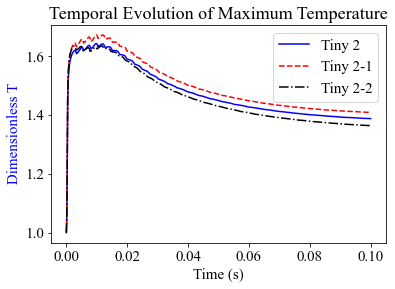

In [33]:
fig, ax = plt.subplots()
ax.set_xlabel(f"Time (s)")
ax.set_title(f"Temporal Evolution of Maximum Temperature",color="k")

ax.plot(df_tiny2["Time"],df_tiny2["max"]/Tref,linestyle="-",label="Tiny 2",color="b")
ax.plot(df_tiny2_1["Time"],df_tiny2_1["max"]/Tref,linestyle="--",label="Tiny 2-1",color="r")
ax.plot(df_tiny2_2["Time"],df_tiny2_2["max"]/Tref,linestyle="-.",label="Tiny 2-2",color="k")
ax.set_ylabel(f"Dimensionless T",color="b")
ax.legend()

Text(0, 0.5, 'Dimensionless T')

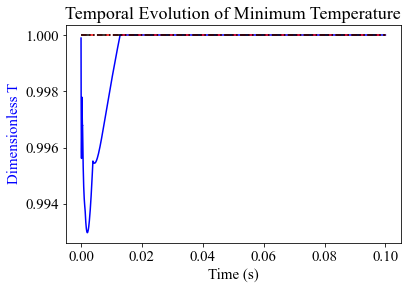

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel(f"Time (s)")
ax.set_title(f"Temporal Evolution of Minimum Temperature",color="k")

ax.plot(df_tiny2["Time"],df_tiny2["min"]/Tref,linestyle="-",label="Tiny 2",color="b")
ax.plot(df_tiny2_1["Time"],df_tiny2_1["min"]/Tref,linestyle="--",label="Tiny 2-1",color="r")
ax.plot(df_tiny2_2["Time"],df_tiny2_2["min"]/Tref,linestyle="-.",label="Tiny 2-2",color="k")
ax.set_ylabel(f"Dimensionless T",color="b")

## Compare the combustion temperature between manual and autmatic time step

### performance
- tiny2_2: manual, 2104.68 s
- tiny2_3: automatic, 2080.03 s  
- tiny2_4: use the PCGStab solver, 2196.01 s
- tiny2_5: p_rgh solver PCG:  4774.48 s 
- tiny2_6: structured decomposition: 1838.38 s

In [10]:
df_tiny2_3=reaMinMaxFile(r"./tiny2_3/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_3.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 5.250000e-05 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 5.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(5.250000e-05 6.250000e-05 5.000000e-07)


In [11]:
df_tiny2_4=reaMinMaxFile(r"./tiny2_4/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_4.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 1.500000e-04 5.000000e-07),773.0,(3.045000e-04 5.550000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.145000e-04 8.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.145000e-04 8.550000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.015000e-04 1.350000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.015000e-04 1.350000e-05 5.000000e-07)


In [16]:
df_tiny2_5=reaMinMaxFile(r"./tiny2_5/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_5.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(3.045000e-04 5.550000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.145000e-04 8.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.145000e-04 8.550000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(2.015000e-04 2.250000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 1.495000e-04 5.000000e-07),773.0,(6.950000e-05 1.365000e-04 5.000000e-07)


In [22]:
df_tiny2_6=reaMinMaxFile(r"./tiny2_6/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_6.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 5.250000e-05 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 6.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 6.500000e-06 5.000000e-07),773.0,(1.275000e-04 6.550000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 5.000000e-07 5.000000e-07),773.0,(5.250000e-05 6.250000e-05 5.000000e-07)


Text(0, 0.5, 'Dimensionless T')

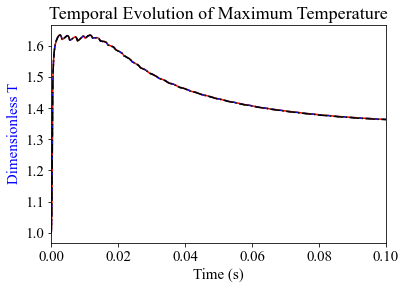

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel(f"Time (s)")
ax.set_title(f"Temporal Evolution of Maximum Temperature",color="k")

ax.plot(df_tiny2_2["Time"],df_tiny2_2["max"]/Tref,linestyle="-",label="Tiny 2-2",color="r")
ax.plot(df_tiny2_3["Time"],df_tiny2_3["max"]/Tref,linestyle="--",label="Tiny 2-3",color="b")
# ax.plot(df_tiny2_4["Time"],df_tiny2_4["max"]/Tref,linestyle="-.",label="Tiny 2-4",color="k")
ax.plot(df_tiny2_5["Time"],df_tiny2_5["max"]/Tref,linestyle=":",label="Tiny 2-5",color="y")
ax.plot(df_tiny2_6["Time"],df_tiny2_6["max"]/Tref,linestyle="-.",label="Tiny 2-6",color="k")
ax.set_xlim([0,0.1])
ax.set_ylabel(f"Dimensionless T",color="b")

### Comments
- all the result are the same except the performance
- the GAMG solver with the GaussSeidel smoother for p_rgh solver is recommended 
- scalar eqn: the performance the GAMG solver with the GaussSeidel smoother and the PBiCGStab solver with the DILU preconditioner are approximate 
- automatic time step control is acceptable 
- structured decomposition is better than the scotch in this case
- top/bottom周期性边界调节，不能横向划分subdomain(沿着top/bottom的边)
- top/bottom绝热边界条件，横向划分subdomain不如纵向效率高

## Compare the combustion temperature between manual and autmatic time step， and with and without renumberMesh -overwrite

### performance 
- tiny2_1: manual, without renumberMesh -overwrite, 2177 s
- iny2_7, automatic, with renumberMesh -overwrite, 1538.03 s

In [29]:
df_tiny2_1=reaMinMaxFile(r"./tiny2_1/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_1.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(6.550000e-05 7.550000e-05 5.000000e-07)


In [31]:
df_tiny2_7=reaMinMaxFile(r"./tiny2_7/postProcessing/minMaxComponents/0/fieldMinMax.dat")
df_tiny2_7.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.535000e-04 1.050000e-05 5.000000e-07)
1,2.640000e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(2.455000e-04 9.550000e-05 5.000000e-07)
2,4.367999e-09,T,773.0000,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.985000e-04 1.650000e-05 5.000000e-07)
3,6.441599e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(1.275000e-04 6.550000e-05 5.000000e-07)
4,8.929917e-09,T,772.9999,(1.500000e-06 1.500000e-06 5.000000e-07),773.0,(3.150000e-05 2.150000e-05 5.000000e-07)


Text(0, 0.5, 'Dimensionless T')

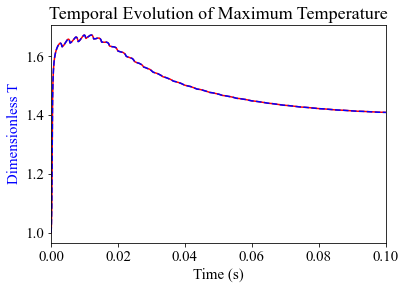

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel(f"Time (s)")
ax.set_title(f"Temporal Evolution of Maximum Temperature",color="k")

ax.plot(df_tiny2_1["Time"],df_tiny2_1["max"]/Tref,linestyle="-",label="Tiny 2-1",color="r")
ax.plot(df_tiny2_7["Time"],df_tiny2_7["max"]/Tref,linestyle="--",label="Tiny 2-7",color="b")
ax.set_xlim([0,0.1])
ax.set_ylabel(f"Dimensionless T",color="b")

### comment
- 上下边界是绝热比周期的温度高一些
- autmatic time step and renumberMesh and structured decomposition 能把速率提高30%